In [1]:
import numpy as np

# Define the distance matrix
distances = np.array([[0, 9, 7, 8],
                      [9, 0, 10, 15],
                      [7, 10, 0, 4],
                      [8, 15, 4, 0]])

# Define the Nearest Neighbor Algorithm
def nearest_neighbor(distances):
    n = distances.shape[0]
    route = [0] # Start at city A
    visited = set([0])
    while len(visited) < n:
        current_city = route[-1]
        nearest_city = min([(i, distances[current_city][i]) for i in range(n) if i not in visited], key=lambda x: x[1])[0]
        route.append(nearest_city)
        visited.add(nearest_city)
    route.append(0) # Return to city A
    return route

# Apply the algorithm to the distance matrix
route = nearest_neighbor(distances)

# Print the optimal route and the total distance
print("Optimal Route: ", route)
print("Total Distance: ", sum(distances[route[i]][route[i+1]] for i in range(len(route)-1)))

Optimal Route:  [0, 2, 3, 1, 0]
Total Distance:  35


In [2]:
import itertools

def brute_force(distances):
    n = distances.shape[0]  # Número de ciudades
    cities = list(range(n))  # Lista de índices de ciudades

    # Generar todas las posibles permutaciones de los índices de ciudades excepto la primera (ciudad inicial)
    permutations = itertools.permutations(cities[1:])

    shortest_distance = float('inf')
    shortest_route = None

    # Iterar sobre todas las permutaciones
    for perm in permutations:
        # Construir la ruta completa desde la ciudad inicial hasta la última ciudad en la permutación
        route = [0] + list(perm) + [0]

        # Calcular la distancia total de la ruta
        total_distance = sum(distances[route[i], route[i+1]] for i in range(len(route)-1))

        # Actualizar la ruta más corta si es necesario
        if total_distance < shortest_distance:
            shortest_distance = total_distance
            shortest_route = route

    return shortest_route, shortest_distance

# Ejemplo de uso:
distances = np.array([[0, 9, 7, 8],
                      [9, 0, 10, 15],
                      [7, 10, 0, 4],
                      [8, 15, 4, 0]])

shortest_route, shortest_distance = brute_force(distances)
print("Ruta más corta:", shortest_route)
print("Distancia más corta:", shortest_distance)


Ruta más corta: [0, 1, 2, 3, 0]
Distancia más corta: 31


In [3]:
import itertools

def brute_force(distances):
    n = distances.shape[0]  # Número de ciudades
    cities = list(range(n))  # Lista de índices de ciudades

    # Generar todas las posibles permutaciones de los índices de ciudades excepto la primera (ciudad inicial)
    permutations = itertools.permutations(cities[1:])

    routes = []  # Lista para almacenar todas las rutas
    distances_list = []  # Lista para almacenar todas las distancias

    # Iterar sobre todas las permutaciones
    for perm in permutations:
        # Construir la ruta completa desde la ciudad inicial hasta la última ciudad en la permutación
        route = [0] + list(perm) + [0]

        # Calcular la distancia total de la ruta
        total_distance = sum(distances[route[i], route[i+1]] for i in range(len(route)-1))

        # Agregar la ruta y su distancia asociada a las listas
        routes.append(route)
        distances_list.append(total_distance)

    return routes, distances_list

# Ejemplo de uso:
distances = np.array([[0, 9, 7, 8],
                      [9, 0, 10, 15],
                      [7, 10, 0, 4],
                      [8, 15, 4, 0]])

all_routes, all_distances = brute_force(distances)

# Imprimir todas las rutas y sus distancias asociadas
for i, route in enumerate(all_routes):
    print(f"Ruta {i+1}: {route}, Distancia: {all_distances[i]}")


Ruta 1: [0, 1, 2, 3, 0], Distancia: 31
Ruta 2: [0, 1, 3, 2, 0], Distancia: 35
Ruta 3: [0, 2, 1, 3, 0], Distancia: 40
Ruta 4: [0, 2, 3, 1, 0], Distancia: 35
Ruta 5: [0, 3, 1, 2, 0], Distancia: 40
Ruta 6: [0, 3, 2, 1, 0], Distancia: 31


# [texto del vínculo](https:// [texto del vínculo](https://))# Partiendo de las coordenadas![ee.PNG](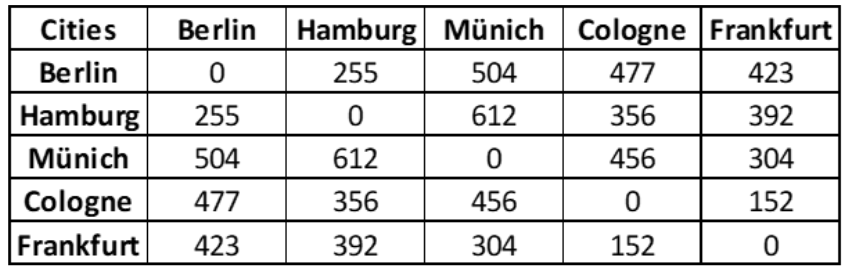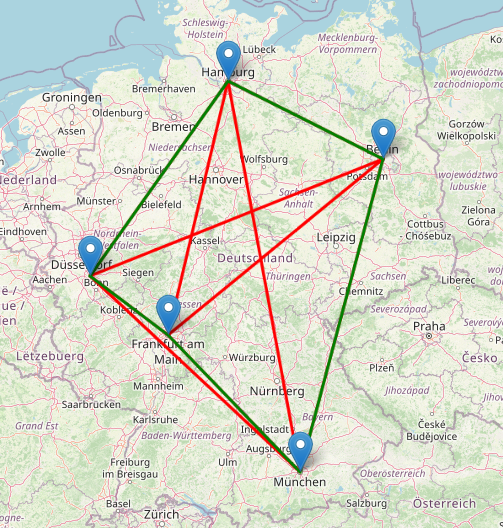)

Optimal Route:  [0, 2, 1, 3, 0]
Total Distance:  94.15914369253308


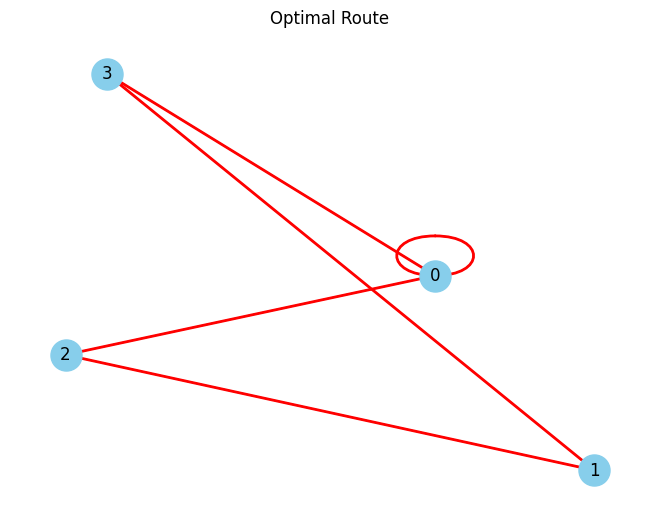

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

np.random.seed(0)


# Define the number of cities
num_cities = 4

# Generate random positions for each city
city_positions = np.random.rand(num_cities, 2) * 100  # Assuming a 100x100 grid

# Define the distance matrix based on city positions
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        distances[i][j] = np.linalg.norm(city_positions[i] - city_positions[j]) #Calculo de distancias usando la distancia euclideana

# Define the Nearest Neighbor Algorithm
def nearest_neighbor(distances):
    n = distances.shape[0]
    route = [0] # Start at city 0
    visited = set([0])
    while len(visited) < n:
        current_city = route[-1]
        nearest_city = min([(i, distances[current_city][i]) for i in range(n) if i not in visited], key=lambda x: x[1])[0]
        route.append(nearest_city)
        visited.add(nearest_city)
    route.append(0) # Return to city 0
    return route

# Apply the algorithm to the distance matrix
route = nearest_neighbor(distances)

# Print the optimal route and the total distance
total_distance = sum(distances[route[i]][route[i+1]] for i in range(len(route) - 1))
print("Optimal Route: ", route)
print("Total Distance: ", total_distance)

# Plotting the cities and optimal route
G = nx.Graph()

# Add cities as nodes
for i, pos in enumerate(city_positions):
    G.add_node(i, pos=pos)

# Add optimal route as edges
for i in range(len(route)-1):
    G.add_edge(route[i], route[i+1])

# Add edge to return to the starting city
G.add_edge(route[-1], route[0])

# Draw nodes and edges
pos = {i: pos for i, pos in enumerate(city_positions)}
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='red', width=2)

plt.title('Optimal Route')
plt.show()


Matriz de distancias para Ciudades

In [ ]:
"""
[0, 255, 504, 477, 423]
[255, 0, 612, 356, 392]
[504, 612, 0, 456, 304]
[477, 356, 456, 0, 152]
[423, 392, 304, 152, 0]
"""

'\n[0, 255, 504, 477, 423]\n[255, 0, 612, 356, 392]\n[504, 612, 0, 456, 304]\n[477, 356, 456, 0, 152]\n[423, 392, 304, 152, 0]\n'

Colima: Latitud 19.2433, Longitud -103.7247

Ciudad Guzmán, Jalisco: Latitud 19.7016, Longitud -103.4615

Guadalajara, Jalisco: Latitud 20.6597, Longitud -103.3496

Melaque, Jalisco: Latitud 19.2136, Longitud -104.7025

Puerto Vallarta, Jalisco: Latitud 20.6534, Longitud -105.2253

In [5]:
# coordinates of cities

colima = {"lat":19.2433, "lon": -103.7247}
ciudad_guzman = {"lat":19.7016, "lon": -103.4615}
guadalajara = {"lat":20.6597, "lon": -103.3496}
melaque = {"lat":19.2136, "lon":-104.7025}
puerto_Vallarta = {"lat":20.6534, "lon": -105.2253}
cities = [colima, ciudad_guzman, guadalajara, melaque, puerto_Vallarta]

In [6]:
import math

def calculate_distance(city1, city2):
    """distance between two cities"""
    lat1, lon1 = city1["lat"], city1["lon"]
    lat2, lon2 = city2["lat"], city2["lon"]
    radius = 6371  # Radius of the Earth in kilometers
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = math.sin(dlat / 2) ** 2 + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = radius * c
    return distance

In [7]:
def get_distance_matrix(cities):
    """populate distance matrix"""
    num_cities = len(cities)
    distances = [[0] * num_cities for _ in range(num_cities)]
    for i in range(num_cities):
        for j in range(i + 1, num_cities):
            dist = calculate_distance(cities[i], cities[j])
            distances[i][j] = int(dist)
            distances[j][i] = int(dist)
    return distances

distances = get_distance_matrix(cities)
for row in distances:
    print(row)

"""
[0, 255, 504, 477, 423]
[255, 0, 612, 356, 392]
[504, 612, 0, 456, 304]
[477, 356, 456, 0, 152]
[423, 392, 304, 152, 0]
"""

[0, 57, 162, 102, 221]
[57, 0, 107, 140, 212]
[162, 107, 0, 214, 195]
[102, 140, 214, 0, 169]
[221, 212, 195, 169, 0]


'\n[0, 255, 504, 477, 423]\n[255, 0, 612, 356, 392]\n[504, 612, 0, 456, 304]\n[477, 356, 456, 0, 152]\n[423, 392, 304, 152, 0]\n'

In [8]:
def solve_tsp_nearest(distances):
    num_cities = len(distances)
    visited = [False] * num_cities
    tour = []
    total_distance = 0

    # Start at the first city
    current_city = 0
    tour.append(current_city)
    visited[current_city] = True


    # Repeat until all cities have been visited
    while len(tour) < num_cities:
        nearest_city = None
        nearest_distance = math.inf

        # Find the nearest unvisited city
        for city in range(num_cities):
            if not visited[city]:
                distance = distances[current_city][city]
                if distance < nearest_distance:
                    nearest_city = city
                    nearest_distance = distance

        # Move to the nearest city
        current_city = nearest_city
        tour.append(current_city)
        visited[current_city] = True
        total_distance += nearest_distance

    # Complete the tour by returning to the starting city
    tour.append(0)
    total_distance += distances[current_city][0]

    return tour, total_distance

tour, total_distance = solve_tsp_nearest(distances)

print("Tour:", tour)
print("Total distance:", total_distance)

"""
Tour: [0, 1, 3, 4, 2, 0]
Total distance: 1571
"""

Tour: [0, 1, 2, 4, 3, 0]
Total distance: 630


'\nTour: [0, 1, 3, 4, 2, 0]\nTotal distance: 1571\n'

Colima: Latitud 19.2433, Longitud -103.7247

Ciudad Guzmán, Jalisco: Latitud 19.7016, Longitud -103.4615

Guadalajara, Jalisco: Latitud 20.6597, Longitud -103.3496

Melaque, Jalisco: Latitud 19.2136, Longitud -104.7025

Puerto Vallarta, Jalisco: Latitud 20.6534, Longitud -105.2253

In [9]:
import folium
m = folium.Map(location=[52.52, 13.405], zoom_start=6)

cities = [(19.2433, -103.7247), (19.7016, -103.4615), (20.6597, -103.3496), (19.2136, -104.7025), (20.6534, -105.2253)]
for i in range(len(cities)):
    folium.Marker(location=cities[i], tooltip=f"City {i}").add_to(m)

paths = [[0, 1], [0, 2], [0, 3], [0, 4], [1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]
for path in paths:
    start_city = cities[path[0]]
    end_city = cities[path[1]]
    folium.PolyLine(locations=[start_city, end_city], color='red').add_to(m)

min_cost_path = [0, 1, 3, 4, 2, 0]
for i in range(len(min_cost_path)-1):
    start_city = cities[min_cost_path[i]]
    end_city = cities[min_cost_path[i+1]]
    folium.PolyLine(locations=[start_city, end_city], color='green').add_to(m)

In [11]:
m

a) Colima capital  

b) Cuahuctemoc     

c) Manzanillo      

d) Minanitlán    

In [ ]:
import numpy as np

# Define the distance matrix
distances = np.array([[0,      18.85,     103.63,  58.2],
                      [18.85,  0,         122.48,  77.05],
                      [103.63, 122.48,    0,       161.83],
                      [58.2,   77.05,     161.83,   0]])

# Define the Nearest Neighbor Algorithm
def nearest_neighbor(distances):
    n = distances.shape[0]
    route = [0] # Start at city A
    visited = set([0])
    while len(visited) < n:
        current_city = route[-1]
        nearest_city = min([(i, distances[current_city][i]) for i in range(n) if i not in visited], key=lambda x: x[1])[0]
        route.append(nearest_city)
        visited.add(nearest_city)
    route.append(0) # Return to city A
    return route

# Apply the algorithm to the distance matrix
route = nearest_neighbor(distances)

# Print the optimal route and the total distance
print("Optimal Route: ", route)
print("Total Distance: ", sum(distances[route[i]][route[i+1]] for i in range(len(route)-1)))

Optimal Route:  [0, 1, 3, 2, 0]
Total Distance:  361.36


a) Colima capital: Latitud: 19.239322 Longitud: -103.724499

b) Cuauhtémoc, Colima: Latitud: 19.328449 Longitud: -103.601745

c) Manzanillo, Colima: Latitud: 19.094002 Longitud: -104.298490

d) Minatitlán, Colima: Latitud: 19.385874 Longitud: -104.049395

In [ ]:
import folium
m = folium.Map(location=[52.52, 13.405], zoom_start=6)

cities = [(19.239322, -103.724499), (19.328449, -103.601745), (19.094002, -104.298490), ( 19.385874, -104.049395)]
for i in range(len(cities)):
    folium.Marker(location=cities[i], tooltip=f"City {i}").add_to(m)

paths = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
for path in paths:
    start_city = cities[path[0]]
    end_city = cities[path[1]]
    folium.PolyLine(locations=[start_city, end_city], color='red').add_to(m)

min_cost_path = [0, 1, 3, 2, 0]
for i in range(len(min_cost_path)-1):
    start_city = cities[min_cost_path[i]]
    end_city = cities[min_cost_path[i+1]]
    folium.PolyLine(locations=[start_city, end_city], color='green').add_to(m)

In [ ]:
m